In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
df= pd.read_csv('Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
df.Genre = df.Genre.map(
{
    'Male':0,
    'Female':1
})

In [58]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
# run kmeans on data
model.fit(df)
#get the cluster assignments
cluster_assignments = model.predict(df)
print("WCSS score at k=2 for kmeans:", model.inertia_)

WCSS score at k=2 for kmeans: 195401.19855991477


In [59]:
wcss=[]
for i in range(1,11,1): 
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

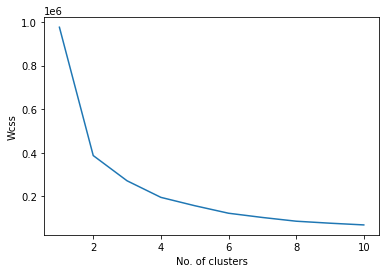

In [60]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.show()

In [42]:
X = df.iloc[:,[3,4]].values

In [61]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [62]:
Clusters_y= kmeans.fit_predict(X)

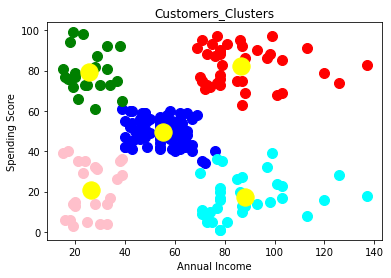

In [63]:
plt.scatter(X[Clusters_y==0, 0], X[Clusters_y==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[Clusters_y==1, 0], X[Clusters_y==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[Clusters_y==2, 0], X[Clusters_y==2, 1], s=100, c='red', label ='Cluster 3')
plt.scatter(X[Clusters_y==3, 0], X[Clusters_y==3, 1], s=100, c='pink', label ='Cluster 4')
plt.scatter(X[Clusters_y==4, 0], X[Clusters_y==4, 1], s=100, c='cyan', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Customers_Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()